In [311]:
import pandas as pd
from dask.dataframe import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from collections import Counter

In [312]:
df = pd.read_csv("ohtani_2024_pa_results.csv")

In [313]:
df.head()

,pitcher,events,home_team,away_team,pitch_name,release_speed,launch_speed,launch_angle,hit_distance_sc,bb_type
0,543037,field_out,NYY,LAD,Knuckle Curve,83.3,79.1,7.0,102.0,ground_ball
1,543037,strikeout,NYY,LAD,Knuckle Curve,87.3,NaN,NaN,NaN,NaN
2,543037,field_out,NYY,LAD,Changeup,90.4,88.2,29.0,317.0,fly_ball
3,596133,catcher_interf,NYY,LAD,Changeup,89.7,NaN,NaN,NaN,NaN
4,543037,field_out,NYY,LAD,4-Seam Fastball,95.6,93.2,45.0,289.0,fly_ball


In [314]:
hit_mapping = {
    'single': 1,
    'double': 2,
    'triple': 3,
    'home_run': 4,
    'walk': 5,
}

In [315]:
def get_opponent(row):
    if row['home_team'] == 'LAD':
        return row['away_team']
    else:
        return row['home_team']

In [316]:
df['target'] = df['events'].apply(lambda x: hit_mapping.get(x.lower(), 0))

In [317]:
df['opponent_team'] = df.apply(get_opponent, axis=1)

In [318]:
df.head(50)

,pitcher,events,home_team,away_team,pitch_name,release_speed,launch_speed,launch_angle,hit_distance_sc,bb_type,target,opponent_team
0,543037,field_out,NYY,LAD,Knuckle Curve,83.3,79.1,7.0,102.0,ground_ball,0,NYY
1,543037,strikeout,NYY,LAD,Knuckle Curve,87.3,NaN,NaN,NaN,NaN,0,NYY
2,543037,field_out,NYY,LAD,Changeup,90.4,88.2,29.0,317.0,fly_ball,0,NYY
3,596133,catcher_interf,NYY,LAD,Changeup,89.7,NaN,NaN,NaN,NaN,0,NYY
4,543037,field_out,NYY,LAD,4-Seam Fastball,95.6,93.2,45.0,289.0,fly_ball,0,NYY
5,661563,field_out,NYY,LAD,Slider,86.6,102.0,30.0,379.0,fly_ball,0,NYY
6,643410,strikeout,NYY,LAD,Split-Finger,85.7,NaN,NaN,NaN,NaN,0,NYY
7,661563,field_out,NYY,LAD,Slider,87.5,83.9,58.0,173.0,popup,0,NYY
8,657612,single,NYY,LAD,Sinker,88.9,103.8,14.0,266.0,line_drive,1,NYY
9,657376,field_out,NYY,LAD,Sinker,95.9,103.9,-17.0,9.0,ground_ball,0,NYY


In [319]:
X = df.drop(columns=['events', 'launch_speed', 'launch_angle', 'hit_distance_sc', 'bb_type','home_team', 'away_team', 'target'])

In [320]:
X = pd.get_dummies(X, columns=['pitch_name'], dtype=int)

In [321]:
# X

In [322]:
# le = LabelEncoder()
#
# X['opponent_team_id'] = le.fit_transform(X['opponent_team'])
# X = X.drop(columns=['opponent_team'])

In [323]:
X = pd.get_dummies(X, columns=['opponent_team'], dtype=int)

In [324]:
X

,pitcher,release_speed,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Cutter,pitch_name_Knuckle Curve,pitch_name_Knuckleball,pitch_name_Other,pitch_name_Sinker,...,opponent_team_PHI,opponent_team_PIT,opponent_team_SD,opponent_team_SEA,opponent_team_SF,opponent_team_STL,opponent_team_TB,opponent_team_TEX,opponent_team_TOR,opponent_team_WSH
0,543037,83.3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,543037,87.3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,543037,90.4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,596133,89.7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,543037,95.6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,663562,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
824,596295,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825,595881,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
826,471911,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [325]:
y = df['target']

In [326]:
y

0      0
1      0
2      0
3      0
4      0
      ..
823    1
824    1
825    5
826    5
827    1
Name: target, Length: 828, dtype: int64

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [328]:
# print(X.isna().sum())

In [329]:
# nm = NearMiss(version=1)
# X_resampled_nm, y_resampled_nm = nm.fit_resample(X_train, y_train)
# print("NearMiss undersampled training data distribution:", Counter(y_resampled_nm))

In [330]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((662, 42), (662,), (166, 42), (166,))

In [331]:
# X_resampled_nm.shape, y_resampled_nm.shape

In [332]:
# rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
# rf_model.fit(X_resampled_nm, y_resampled_nm)

RandomForestClassifier(random_state=42)

In [333]:
y_pred = rf_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       104
           1       0.31      0.17      0.22        23
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        18

    accuracy                           0.55       166
   macro avg       0.16      0.17      0.16       166
weighted avg       0.44      0.55      0.49       166



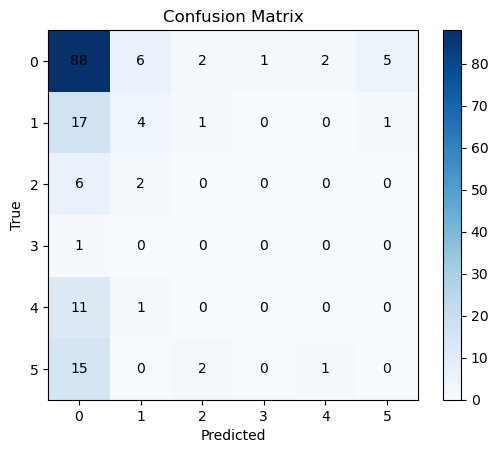

In [334]:
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
plt.colorbar(im)

# Add labels
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Add numbers on each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

In [335]:
team_distribution = df['target'].value_counts()
team_distribution

target
0    517
1    115
5     90
4     58
2     40
3      8
Name: count, dtype: int64